___
# Atividade: Teoria da Probabilidade
___

## Aula 08

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): pág. 49 a 68 - Probabilidades

**Hoje:**
1. Conceito de Probabilidade
4. Probabilidade Condicional
3. Independência de eventos
5. Teorema de Bayes. Simulação do problema de Monty Hall

**Próxima aula:**
1. Magalhães e Lima (7ª. Edição): pág. 69 a 104 - Variáveis aleatórias discretas
___

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Bibliotecas necessárias
from numpy.random import shuffle, randint, choice

## <font color='blue'>Exercício 1</font>

Monte a simulação de 1000 jogadas de um dado idôneo de 6 faces. Faça o histograma (normalizado) da frequência.

    a) Olhando o histograma, o que pode se dizer sobre as probabilidade de cada face?
    
    b) Discorra sobre o porque da probabilidade não ser exatamente igual à teórica.

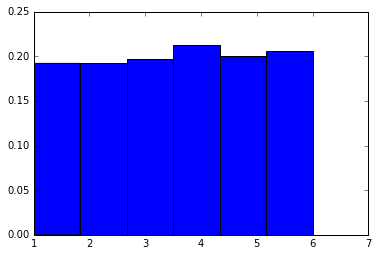

In [3]:
d1 = np.random.random_integers(1, 6, 1000)
count, bins, ignored = plt.hist(d1,6, normed=True)
plt.show()


Por ser aleatório, nem sempre ele irá seguir a risca a probabilidade (ex: se você jogar o dado 6 vezes, é muito difícil cair uma vez em cada). Porém, se você aumentar o número de simulações, cada vez mais elas irão convergir para a probabilidade teórica. Além disso, outra opção é de que o método aleatório do python não é realmente aleatório.

___
## <font color='blue'>Exercício 2</font>

Ampliando o espaço amostral para as possíveis jogadas de 2 dados, analise as seguintes situações:
    
    a) Jogando os dois dados ao mesmo tempo. Qual é a probabilidade de obter soma 7?
    
    b) Jogando um dado e depois o segundo dado. Qual é a probabilidade de obter soma 7 já sabendo o resultado do primeiro? Compare o resultado com item anterior! Por que é igual ou diferente?

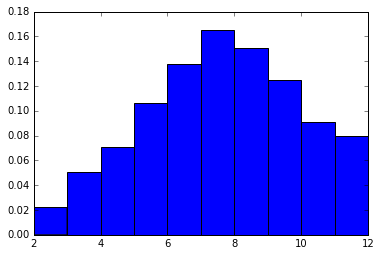

In [5]:
d1 = np.random.random_integers(1, 6,1000)
d2 = np.random.random_integers(1, 6,1000)
count, bins, ignored = plt.hist(d1+d2, normed=True)
plt.show()

Diferentemente do problema de Monty Hall, não há uma escolha a ser feita com o dado. Dessa maneira, jogar os dois dados juntos ou jogar o primeiro e depois o segundo não faz diferença nenhuma, já que a probabilidade se mantêm

___
## <font color='blue'>Exercício 3</font>

Simule 10000 vezes o problema de Monty Hall¹ , usar o seguinte algoritmo:


* Repetir 10000 vezes:
    * Sorteie um número de porta de 1 a 3 para ser a premiada
    * Sorteie um número de porta de 1 a 3 para ser a porta escolhida.
    * Sorteie um número de porta para ser a aberta, desde que não seja a premiada e nem a porta escolhida. Assim, se:
        * porta premiada é 1 e a escolhida é 1, sorteie entre as portas 2 e 3 para ser aberta
        * porta premiada é 1 e a escolhida é 2, com probabilidade 1 deve abrir a porta 3
        * porta premiada é 1 e a escolhida é 3, com probabilidade 1 deve abrir a porta 2
        * assim para demais casos...
    
    * Calcule quantas vezes indivíduo ganha ao trocar de porta. Ou seja, se:
        * porta premiada é 1, a escolhida é 1 e aberta é 2 (ou 3), indivíduo perde se trocar de porta
        * porta premiada é 1, a escolhida é 2 e aberta é 3, indivíduo ganha se trocar de porta
        * porta premiada é 1, a escolhida é 3 e aberta é 2, indivíduo ganha se trocar de porta
        * assim para demais casos...
        
    * Exibir quantas vezes em 10000, o indivíduo ganhou ao trocar de porta.

Compare o resultado numérico com o resultado analítico obtido via Teorema de Bayes.

¹https://en.wikipedia.org/wiki/Monty_Hall_problem e 
Exercício 1.4.5 de http://www.portalaction.com.br/probabilidades/14-eventos-independentes-e-probabilidade-condicional

### Modo didático
```python
ganhouTrocando = 0
for i in range(0,10000):
    prize = np.random.random_integers(1, 3)
    choice = np.random.random_integers(1, 3)
    possible = [1,2,3]
    openDoor = 0

    if (prize == choice):
        possible.remove(prize)
        openDoor = np.random.choice(possible)

    else:
        ganhouTrocando += 1
```

In [10]:
#Performático
ganhouOriginal = 0
ganhouTrocando = 0
for i in range(0,10000):
    prize = np.random.random_integers(1, 3)
    choice = np.random.random_integers(1, 3)
    if (prize != choice):
        ganhouTrocando += 1
    else:
        ganhouOriginal+=1
print("Número de vezes que ganhou trocando de porta: {0}\nNúmero de vezes que perdeu trocando de porta: {1}".format(ganhouTrocando,ganhouOriginal))

Número de vezes que ganhou trocando de porta: 6755
Número de vezes que perdeu trocando de porta: 3245
